In [10]:
import numpy as np
import math
import os
import re
from time import time

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image




In [11]:
def read_tiff(path, n_images):
    """
    path - Path to the multipage-tiff file
    n_images - Number of pages in the tiff file
    """
 
    img = Image.open(path)
    #images = np.array()
    images = []
    for i in range(n_images):
        try:
            img.seek(i)

            #np.stack(images, np.array(img))
            images.append(np.array(img))

        except EOFError:
            # Not enough frames in img
            break

    return np.array(images)

In [9]:
print(1240*1120*20 / (1000*1000))

27.776


In [7]:
print(700*600*500 / (1000*1000) / 8)

26.25


In [22]:
# read multi-tiff

path = 'e:\\Data\\bone_load\\syn13\\'
file_name = 'reg1_center_4d_stack_700_600_500.tif'

max_read_images = 500*10 # all: 2880
    
start = time()
images = read_tiff(path + file_name, max_read_images)
end = time()

print ('Time elapsed: ', (end-start))


Time elapsed:  5.747000217437744


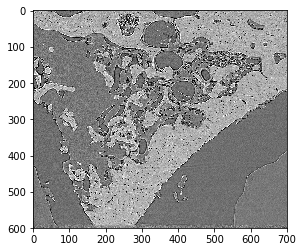

In [34]:
plt.imshow(images[0], cmap='gray')
plt.show()


Blocks: (4, 4, 4)
Block sizes: (175, 150, 125)
Voxels per block (M): 3.28125


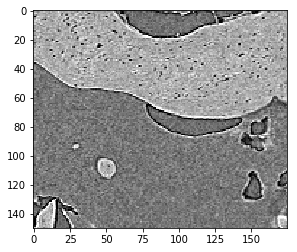

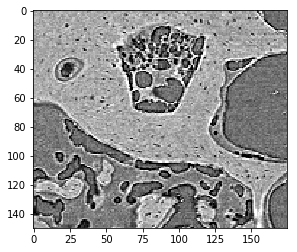

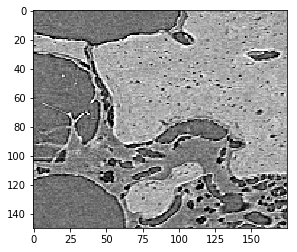

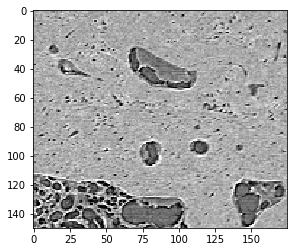

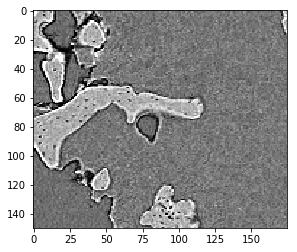

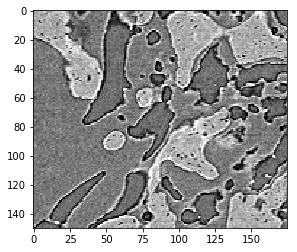

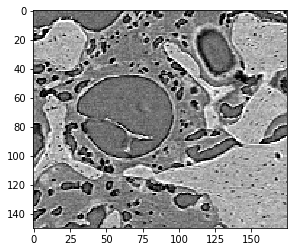

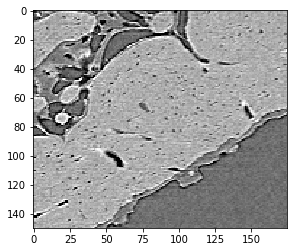

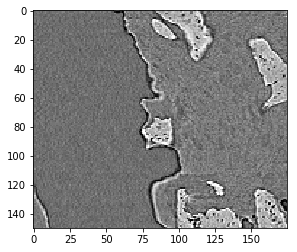

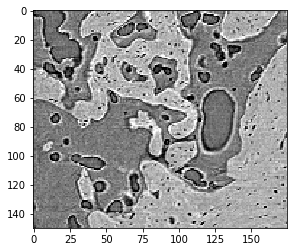

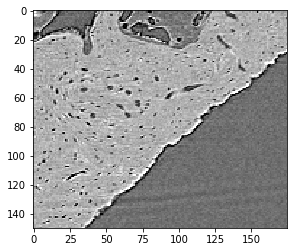

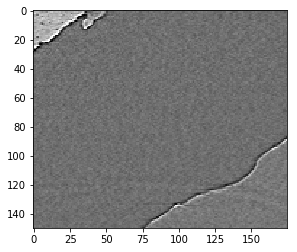

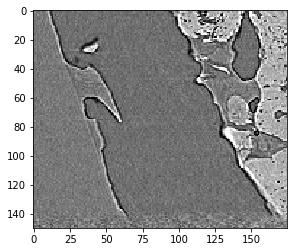

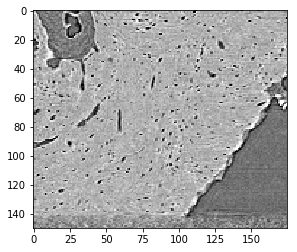

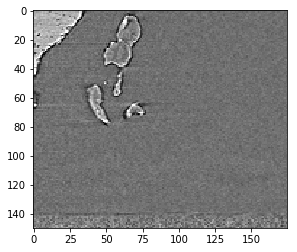

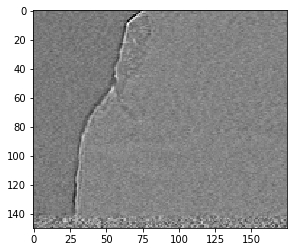

In [36]:
xdim = 4
ydim = 4
zdim = 4

block_dim = (xdim,ydim,zdim)

ext = 50

n_frames = 10

bx = int(images.shape[2] / block_dim[0])
by = int(images.shape[1] / block_dim[1])
bz = int(images.shape[0] / n_frames / block_dim[2])

print('Blocks:', block_dim)
print('Block sizes:', (bx, by, bz))

print('Voxels per block (M):', bx*by*bz / (1000*1000))
#for frame in range(n_frames):
    
for i in range(ydim):
    for j in range(xdim):
        im = images[0,i*by:(i+1)*by, j*bx:(j+1)*bx]
        plt.imshow(im, cmap='gray')
        plt.show()
